# Демонстрация закона больших чисел

Сыграем $n$ пратий «Let's Make a Deal».

Как Вы помните, рассматривались три стратегии:

**1)** не менять выбор (STAY);

**2)** изменить выбор случайным образом (RANDOM CHOICE);

**3)** изменить свой выбор на противоположный (SWITCH).

Предположим, что мы придерживаемся первой стратегии. Пусть $X_k$ — индикатор выигрыша в партии номер $k$.

Если мы придерживаемся первой стратегии, то  $\operatorname{E} X_k=\frac 13.$

Пусть $\overline {X}_{n}={\frac {1}{n}}(X_{1}+\ldots +X_{n})$ — среднее число выигрышей при такой стратегии.

Тогда согласно закону больших чисел получим, что  $\forall \varepsilon >0\quad  \lim \limits_{n\to \infty }\ P\!\left(\,\left|{\overline {X}}_{n}-\frac 13 \right|>\varepsilon \,\right)=0.$

Наглядно убедимся, что это так.

In [2]:
from random import randint
from random import choice
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
n = 10000
counter = 0
for _ in range(n):
    car = randint(1, 3)
    contestant_choice = randint(1, 3)
    if car == contestant_choice:
        counter += 1

print('Количество выигрышей при первой стратегии (STAY):', counter, 'из', n )

Количество выигрышей при первой стратегии (STAY): 3317 из 10000


In [4]:
n = 10000
counter = 0
for _ in range(n):
    doors = [1, 2, 3]
    car = randint(1, 3)
    contestant_choice = randint(1, 3)
    doors.remove(contestant_choice) #игрок меняет ответ
    
    if contestant_choice == car:
        host_choice = choice(doors)
    else:
        doors.remove(car)
        host_choice = choice(doors)
        doors.append(car)
    
    doors.remove(host_choice)    #ведущий открыл дверь
    if doors[0] == car:
        counter += 1
print('Количество выигрышей при третьей стратегии (SWITCH):', counter, 'из', n )

Количество выигрышей при третьей стратегии (SWITCH): 6663 из 10000


In [5]:
def LLN_visualisation(n):
    counter = 0
    for _ in range(n):
        car = randint(1, 3)
        contestant_choice = randint(1, 3)
        if car == contestant_choice:
            counter += 1
    return(counter)

   # print('Количество выигрышей при первой стратегии (STAY):', counter, 'из', n )
    
LLN_visualisation(1000)


326

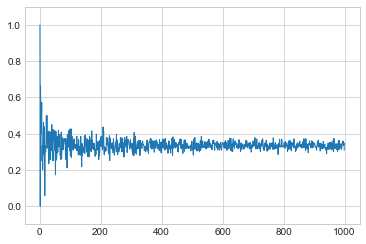

In [9]:
probability = [LLN_visualisation(i)/i for i in range(1, 1000)]
plt.plot(range(1, 1000),probability, '-', linewidth = 1)
plt.ylim(-0.1,1.1)
plt.show()